In [1]:
import numpy as np
import pylab as plt
%matplotlib notebook

# plt.figure(figsize = (6,2))
# srate = 5000
# t = np.linspace(0,1,1*srate)
# plt.plot(t,sqsine(1,40,srate,post_ramp = 0.2))


In [2]:
import threading
import nidaqmx
from nidaqmx.stream_writers import AnalogMultiChannelWriter
from nidaqmx.stream_readers import AnalogMultiChannelReader
from nidaqmx.stream_writers import DigitalMultiChannelWriter
from labdaq.stimgen import *

class TriggeredOptogeneticsWaveform():
    def __init__(self,
                 device = 'dev1',
                 waveform_channel = 0,
                 trigger_channel = None,
                 sampling_rate = None,
                 vrange = 10):
        self.device = device
        self.waveform_channel = waveform_channel
        self.trigger_channel = trigger_channel
        self.vrange = vrange
        self.sampling_rate = sampling_rate
        
        self.task_ao = nidaqmx.Task()
        self.task_ao.ao_channels.add_ao_voltage_chan('{0}/ao{1}'.format(self.device,self.waveform_channel),
                        min_val = -1*vrange,
                        max_val = vrange)
        if self.sampling_rate is None:
            self.sampling_rate = self.task_ao.timing.samp_clk_max_rate
        self.task_ao.timing.samp_clk_rate = self.sampling_rate
        self.waveform_parameters = None
        self.loaded = False
        self.trigger_task = False
    def load(self,
             generator = 'sqsine',
             duration = 1,
             amplitude = 1,
             frequency = 40,
             pre_ramp = 0,
             post_ramp = 0.5,
             trigger = True,
             trigger_retriggerable = False,
             **kwargs):
        self.waveform = None
        self.loaded = False
        if generator == 'sqsine':
            self.waveform_parameters = dict(generator = generator,
                                            duration = duration,
                                            amplitude = amplitude,
                                            frequency = frequency,
                                            pre_ramp = pre_ramp,
                                            post_ramp = post_ramp,
                                            sampling_rate = self.sampling_rate,
                                            **kwargs)
            self.waveform = self.waveform_parameters['amplitude']*sqsine_ramp(**self.waveform_parameters)
        else:
            raise(ValueError('Could not load waveform. Unknown generator {0}'.format(generator)))
        #self.task_ao.export_signals.export_signal(nidaqmx.constants.Signal.SAMPLE_CLOCK, 'PFI0')
        self.task_ao.stop()
        self.task_ao.timing.cfg_samp_clk_timing(
            rate = self.sampling_rate,
            samps_per_chan = len(self.waveform))
        if not trigger_line is None:
            self.task_ao.triggers.start_trigger.cfg_dig_edge_start_trig(
                trigger_source = trigger_line,
                trigger_edge=nidaqmx.constants.Edge.RISING)
            try:
                self.task_ao.triggers.start_trigger.retriggerable = trigger_retriggerable
            except nidaqmx.DaqError:
                pass
            self.trigger_task = True
        else:
            self.trigger_task = False
        self.task_ao.write(self.waveform,auto_start=self.trigger_task)
        self.loaded = True
        
    def start(self):
        if not self.trigger_task:
            if task.task_ao.is_task_done():
                task.task_ao.stop()
                self.task_ao.start()
            else:
                print('Task not started because it is still running.')
        else:
            print('This is a trigger task.')
    def stop(self):
        task.task_ao.stop()
    
    def close(self):
        if not self.task_ao is None:
            self.task_ao.close()
            self.task_ao = None



In [3]:
task = TriggeredOptogeneticsWaveform()
# task.load(frequency=40)

In [26]:
task.load(frequency=40,amplitude = 10, post_ramp = 0.25,trigger_line='PFI0')

C:\conda\lib\site-packages\nidaqmx\errors.py:209: DaqWarning: 
Warning 200010 occurred.

Finite acquisition or generation has been stopped before the requested number of samples were acquired or generated.
  warnings.warn(DaqWarning(


In [ ]:
task.task_ao.timing.cfg_samp_clk_timing(rate=5000,samps_per_chan=2)
task.task_ao.write([2.5,2.5],auto_start=True)

In [23]:
task.task_ao.stop()

# # task.task_ao.wait_until_done()
# task.task_ao.stop()# nidaqmx.constants.SampleTimingType.SAMPLE_CLOCK
    

In [27]:
task.task_ao..start_trigger.retrigger_win

DaqError: Specified property is not supported by the device or is not applicable to the task.
Property: DAQmx_StartTrig_RetriggerWin

Task Name: _unnamedTask<0>

Status Code: -200452

In [ ]:
task_ao.write(10*sqsine(1,100,5000,post_ramp = 0.2),auto_start=True)

In [ ]:
task.task_ao.write([2,2],auto_start=True)

In [ ]:
task_ao.write([1,1],auto_start=True)

<IPython.core.display.Javascript object>


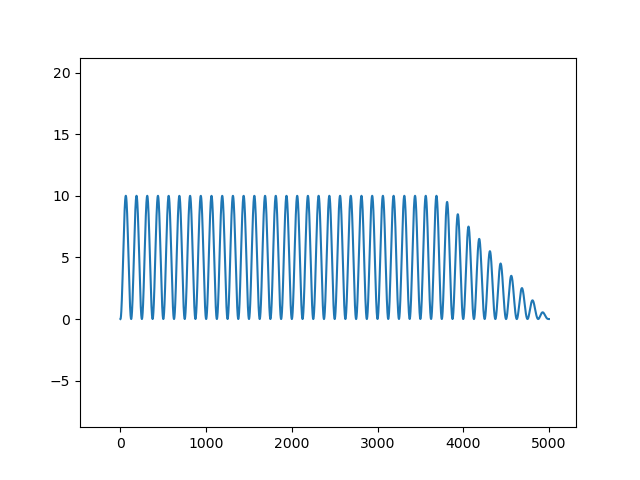

In [13]:
plt.plot(task.waveform)